# Identificación y tratamiento de outliers

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [59]:
data = pd.read_csv('E:/Bases/Otros/bupa.csv',sep=";")

In [60]:
data.shape

(345, 7)

In [61]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [62]:
data.dtypes

V1      int64
V2      int64
V3      int64
V4      int64
V5      int64
V6    float64
V7      int64
dtype: object

In [63]:
data['V7'] = data.V7.astype(object)

In [64]:
data.dtypes

V1      int64
V2      int64
V3      int64
V4      int64
V5      int64
V6    float64
V7     object
dtype: object

In [71]:
data_X = pd.DataFrame(data.drop('V7', 1))
data_X.head()

,V1,V2,V3,V4,V5,V6
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


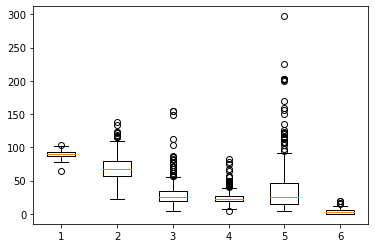

In [72]:
#1.Boxplot
plt.boxplot(data_X)
plt.show()

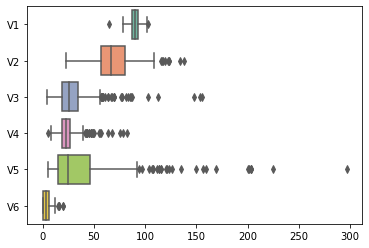

In [78]:
sns.boxplot(data=data_X, orient="h", palette="Set2")
plt.show()

In [73]:
#2.Outlier
def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [90]:
outlier_z = z_score_method(df=data_X,variable_name='V1')
print(outlier_z)

[223]


In [91]:
outlier_z = z_score_method(df=data_X,variable_name='V2')
print(outlier_z)

[122, 334]


In [92]:
outlier_z = z_score_method(df=data_X,variable_name='V3')
print(outlier_z)

[35, 133, 232, 299, 316]


In [93]:
outlier_z = z_score_method(df=data_X,variable_name='V4')
print(outlier_z)

[35, 110, 185, 232, 285, 299, 316, 322]


In [94]:
outlier_z = z_score_method(df=data_X,variable_name='V5')
print(outlier_z)

[76, 84, 114, 178, 189, 232, 315, 322, 330, 341]


In [95]:
outlier_z = z_score_method(df=data_X,variable_name='V6')
print(outlier_z)

[188, 189, 342, 343, 344]
